<a href="https://colab.research.google.com/github/mayankawrr/EDA-Probability-Distributions/blob/main/Parameter_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
P=0.4

In [35]:
import numpy as np

# Generate a sample of 20 Bernoulli random variables
sample_size = 20
bernoulli_sample = np.random.binomial(1, P, size=sample_size)

In [36]:
# Generate 100 such samples
num_samples = 10000
sampling = [np.random.binomial(1, P, size=sample_size) for _ in range(num_samples)]
print("\nFirst 5 of the 100 samples:")
for i in range(5):
    print(f"Sample {i+1}: {sampling[i]}")


First 5 of the 100 samples:
Sample 1: [1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0]
Sample 2: [0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1]
Sample 3: [0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0]
Sample 4: [1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0]
Sample 5: [0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1]


In [37]:
def estimator(data_list):
  """
  Computes the mean of a list.

  Args:
    data_list: A list of numbers.

  Returns:
    The mean of the list.
  """
  return sum(data_list) / len(data_list)

In [38]:
estimates=[]
for i in range (10000):
  estimates.append(estimator(sampling[i]))

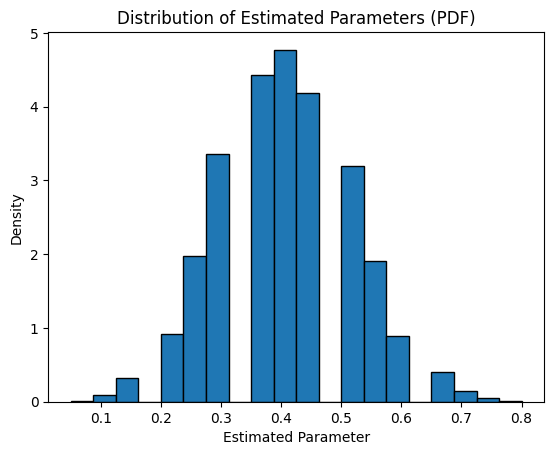

In [39]:
import matplotlib.pyplot as plt

plt.hist(estimates, bins=20, edgecolor='black', density=True)
plt.xlabel("Estimated Parameter")
plt.ylabel("Density")
plt.title("Distribution of Estimated Parameters (PDF)")
plt.show()

We got,
* distribution of T
* 100 samples, together known as sampling

Both random variables we have caught, but Parameter we didn't

If we perform, infinite samplings, the average value of Estimates to Parameter (CLT)


In [40]:
import numpy as np

practical_parameter_estimate = np.mean(estimates)
print(f"The practical value of the parameter based on the average of the estimates is: {practical_parameter_estimate}")

The practical value of the parameter based on the average of the estimates is: 0.4004849999999999


Above is the true P value which is a constant and not a random variable

Error for each estimate:
[np.float64(0.0), np.float64(0.19999999999999996), np.float64(0.04999999999999999), np.float64(0.04999999999999999), np.float64(0.29999999999999993), np.float64(0.04999999999999999), np.float64(-0.050000000000000044), np.float64(0.0), np.float64(-0.2), np.float64(-0.10000000000000003), np.float64(0.09999999999999998), np.float64(0.04999999999999999), np.float64(0.15000000000000002), np.float64(-0.050000000000000044), np.float64(0.0), np.float64(-0.10000000000000003), np.float64(-0.10000000000000003), np.float64(-0.15000000000000002), np.float64(-0.2), np.float64(0.19999999999999996), np.float64(-0.050000000000000044), np.float64(0.19999999999999996), np.float64(-0.050000000000000044), np.float64(-0.050000000000000044), np.float64(0.19999999999999996), np.float64(0.15000000000000002), np.float64(0.04999999999999999), np.float64(0.04999999999999999), np.float64(0.15000000000000002), np.float64(0.09999999999999998), np.float64(0.15000000000000002), np.float64(-0.0

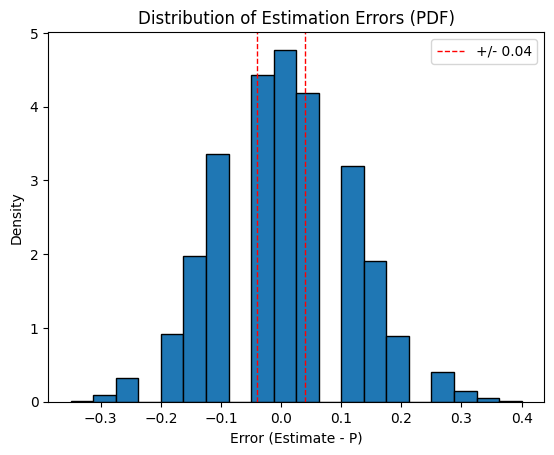

In [41]:
# Calculate the error for each estimate
error = [estimate - P for estimate in estimates]

# Print the error list
print("Error for each estimate:")
print(error)

# Plot the distribution of the errors
import matplotlib.pyplot as plt

plt.hist(error, bins=20, edgecolor='black', density=True)
plt.xlabel("Error (Estimate - P)")
plt.ylabel("Density")
plt.title("Distribution of Estimation Errors (PDF)")

# Add vertical lines at +/- 10% of P
error_threshold = 0.1 * P
plt.axvline(error_threshold, color='red', linestyle='dashed', linewidth=1, label=f'+/- {error_threshold:.2f}')
plt.axvline(-error_threshold, color='red', linestyle='dashed', linewidth=1)
plt.legend()

plt.show()

In [42]:
import numpy as np

expected_value_of_error = np.mean(error)
print(f"The practical expected value of the error is: {expected_value_of_error}")

The practical expected value of the error is: 0.0004849999999999815


In [43]:
import numpy as np

variance_of_error = np.var(error)
print(f"The variance of the error is: {variance_of_error}")

The variance of the error is: 0.012116014775


The variance we calculated is the same "variance" term in the bias-variance decomposition. And we will use it soon.

In [44]:
# Calculate the bias of the estimator
bias = practical_parameter_estimate - P

print(f"The practical bias of the estimator is: {bias}")

The practical bias of the estimator is: 0.0004849999999999022


Theoretical Bias = 0, as mean of error converges to true population error mean as number of samples is very large

The above practical bias is same as the expected value of the error which we calculated already, a bias can be +ve, -ve or 0

Error Estiamte could have been, 4.11111, 3.9999, 4 if we did resampling, so it could be +ve, -ve or 0, also in some individual samples if it was 4.1 and 3.9, then the averages cancel out each other and we get 4, which is misleading

So we talk about Risk instead

In [45]:
import numpy as np

# Calculate the squared error for each estimate
squared_error = [e**2 for e in error]

# Calculate the Mean Squared Error (MSE)
mean_squared_error = np.mean(squared_error)
print(f"The Mean Squared Error (Risk) is: {mean_squared_error}")

The Mean Squared Error (Risk) is: 0.012116250000000002


It penalized all the deviations equally, and makes sure that +ve and -ve error values do not cancel out each other in averaging

# Bias, Variance, Risk Tradeoff

$$
\text{Bias} = \mathbb{E}\left[ \hat{\theta} \right] - \theta
$$

$$
\text{Risk} = \mathbb{E} \left[ \left( \hat{\theta} - \theta \right)^2 \right]
$$

$$
\text{Variance} = \mathbb{E} \left[ \left( \hat{\theta} - \mathbb{E}\left[ \hat{\theta} \right] \right)^2 \right]
$$

# Explanations

$$
\mathbb{E}\left[ \hat{\theta} \right] = \text{Mean of estimator (sample)}
$$

$$
\theta = \text{True parameter (population)}
$$

# Moments

Raw moments (about origin): $\mathbb{E}[X]$

Central moments (about the mean): $\mathbb{E}[X - \mu]$

# Limit Properties

$$
\mathbb{E}\left[ \hat{\theta} \right] \text{ when } n \to \infty = \theta
$$

$$
\mathbb{E}[X] = \mu \quad \text{(mean)}
$$

**The variance of the error is equal to the variance of the estimator.**

This is because the error is defined as:
$$
\text{Error} = \hat{\theta} - \theta
$$
where $\hat{\theta}$ is the estimator and $\theta$ is the true parameter (a constant).

The variance of a random variable minus a constant is equal to the variance of the random variable itself:
$$
\text{Var}(\hat{\theta} - \theta) = \text{Var}(\hat{\theta})
$$



Bias = 1st raw moment of error

Risk = 2nd raw moment of error

Variance = 2nd central moment of error




We know the relationship between the second raw moment, the first raw moment (mean), and the second central moment (variance):

$$
\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$

or

$$
\text{Second Central Moment} = \text{Second Raw Moment} - (\text{First Raw Moment})^2
$$

Now, let's apply this to the error term, which is $\text{Error} = \hat{\theta} - \theta$.

The expected value of the error (First Raw Moment of Error) is:
$$
\mathbb{E}[\hat{\theta} - \theta] = \mathbb{E}[\hat{\theta}] - \mathbb{E}[\theta] = \mathbb{E}[\hat{\theta}] - \theta \quad (\text{since } \theta \text{ is a constant})
$$
This is the **Bias** of the estimator.

The expected value of the squared error (Second Raw Moment of Error) is:
$$
\mathbb{E}[(\hat{\theta} - \theta)^2]
$$
This is the **Mean Squared Error (Risk)**.

The variance of the error (Second Central Moment of Error) is:
$$
\text{Var}(\hat{\theta} - \theta)
$$
As we established, $\text{Var}(\hat{\theta} - \theta) = \text{Var}(\hat{\theta})$, which is the **Variance of the Estimator**.

Using the relationship $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$ and substituting the error term:

$$
\text{Var}(\hat{\theta} - \theta) = \mathbb{E}[(\hat{\theta} - \theta)^2] - (\mathbb{E}[\hat{\theta} - \theta])^2
$$

Substituting the definitions of Risk, Variance of Estimator, and Bias:

$$
\text{Variance of Estimator} = \text{Risk} - (\text{Bias})^2
$$

Rearranging this equation, we get the **Bias-Variance Decomposition (without the irreducible error term)**:

$$
\text{Risk} = (\text{Bias})^2 + \text{Variance of Estimator}
$$

This shows how the Mean Squared Error (Risk) is decomposed into the squared bias and the variance of the estimator.

In [46]:
# Verify the bias-variance tradeoff equation
# Risk = Bias^2 + Variance of Estimator

# We have:
# mean_squared_error (Risk)
# bias
# variance_of_error (Variance of Estimator)

# Calculate Bias^2 + Variance
bias_squared_plus_variance = bias**2 + variance_of_error

print(f"Calculated Mean Squared Error (Risk): {mean_squared_error}")
print(f"Bias^2 + Variance of Error: {bias_squared_plus_variance}")

# Check if they are approximately equal
tolerance = 1e-9  # Allow for small floating-point differences
if abs(mean_squared_error - bias_squared_plus_variance) < tolerance:
    print("\nThe bias-variance tradeoff equation holds true with the calculated values.")
else:
    print("\nThere is a small difference between the calculated values, likely due to floating-point precision.")
    print(f"Difference: {abs(mean_squared_error - bias_squared_plus_variance)}")

Calculated Mean Squared Error (Risk): 0.012116250000000002
Bias^2 + Variance of Error: 0.01211625

The bias-variance tradeoff equation holds true with the calculated values.


Based on the relationship $\text{Error} = \hat{\theta} - \theta$, where $\hat{\theta}$ is the estimator and $\theta$ is the true parameter (a constant), we can see that the estimator is related to the error by:

$$
\hat{\theta} = \text{Error} + \theta
$$

This means that the values of the estimator are obtained by adding the true parameter $\theta$ to the corresponding error values.

Therefore, the distribution of the estimator is simply a **translated** (shifted) version of the distribution of the error. The shape and spread (variance) of the two distributions are identical, but their location on the x-axis is different. The error distribution is centered around 0 (for an unbiased estimator) or the Bias (for a biased estimator), while the estimator distribution is centered around the true parameter $\theta$ (for an unbiased estimator) or the expected value of the estimator $\mathbb{E}[\hat{\theta}]$ (for a biased estimator).

$$
\text{Risk} = (\text{Bias})^2 + \text{Variance of Estimator}
$$

This is a beautiful equation, connects so many important things together


First 10 Dummy Error values: [-0.07682765 -0.32464092  0.12060791 -0.18132759 -0.04212941 -0.02162616
  0.05275152 -0.12012189  0.07417973 -0.06481447]
First 10 Dummy Estimator values: [0.32317235 0.07535908 0.52060791 0.21867241 0.35787059 0.37837384
 0.45275152 0.27987811 0.47417973 0.33518553]


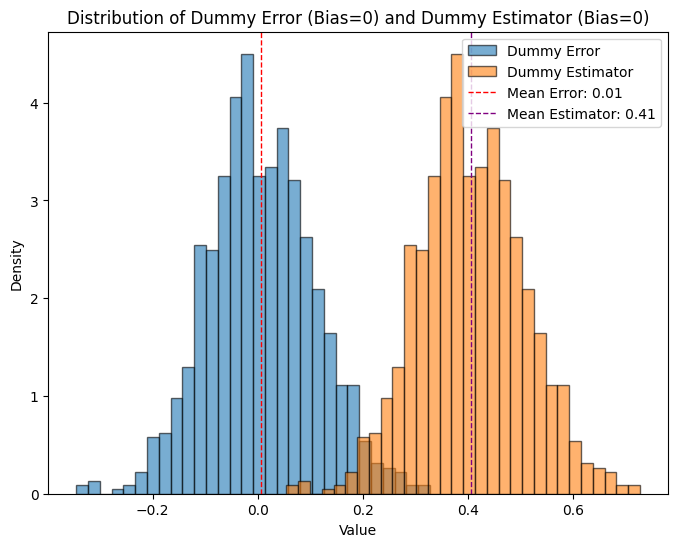

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy example values using a normal distribution for error
# Mean of error is 0 for an unbiased estimator
# Variance of error can be chosen arbitrarily for a dummy example
dummy_error = np.random.normal(loc=0, scale=0.1, size=1000) # mean=0, std dev=0.1
dummy_true_parameter = 0.4

# Calculate dummy estimator values
dummy_estimator = dummy_error + dummy_true_parameter

print("First 10 Dummy Error values:", dummy_error[:10])
print("First 10 Dummy Estimator values:", dummy_estimator[:10])

# Plot the distributions on the same graph
plt.figure(figsize=(8, 6))

plt.hist(dummy_error, bins=30, edgecolor='black', density=True, alpha=0.6, label='Dummy Error')
plt.hist(dummy_estimator, bins=30, edgecolor='black', density=True, alpha=0.6, label='Dummy Estimator')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Distribution of Dummy Error (Bias=0) and Dummy Estimator (Bias=0)")
plt.axvline(np.mean(dummy_error), color='red', linestyle='dashed', linewidth=1, label=f'Mean Error: {np.mean(dummy_error):.2f}')
plt.axvline(np.mean(dummy_estimator), color='purple', linestyle='dashed', linewidth=1, label=f'Mean Estimator: {np.mean(dummy_estimator):.2f}')

plt.legend()
plt.show()

$$
\text{Risk} = \mathbb{E} \left[ \left( \hat{\theta} - \theta \right)^2 \right] = \text{Variance of Estimator (in unbiased)}
$$

$$
\mathbb{E}\left[ \hat{\theta} \right] = \text{Mean of estimator }
$$

$$
\text{Bias} = \mathbb{E}\left[ \hat{\theta} \right] - \theta = \text{Mean of error}
$$


First 10 Dummy Biased Error values: [2.05687064 2.06607951 2.00481269 1.87336989 1.98777426 1.96333199
 1.7824276  1.95279508 2.17884597 2.1142338 ]
First 10 Dummy Biased Estimator values: [2.45687064 2.46607951 2.40481269 2.27336989 2.38777426 2.36333199
 2.1824276  2.35279508 2.57884597 2.5142338 ]


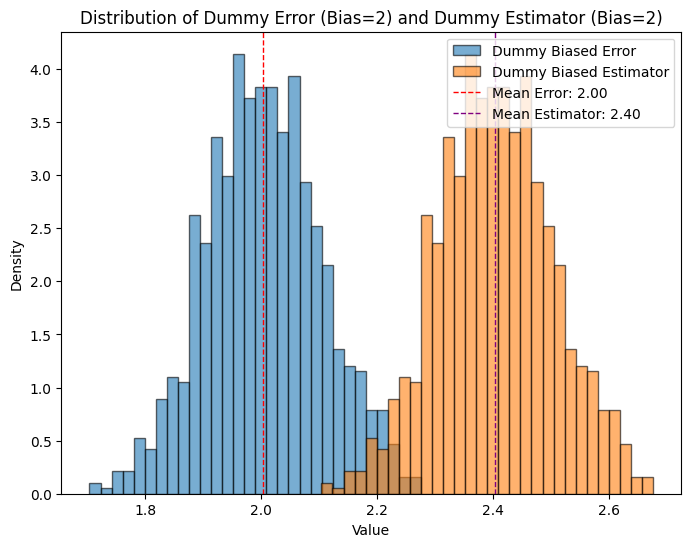

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy example values using a normal distribution for error with bias
bias_value = 2
# Mean of error is equal to the bias for a biased estimator
# Variance of error can be chosen arbitrarily
dummy_error_biased = np.random.normal(loc=bias_value, scale=0.1, size=1000) # mean=bias, std dev=0.1
dummy_true_parameter = 0.4 # True parameter remains the same

# Calculate dummy estimator values for the biased case
# Estimator = Error + True Parameter
dummy_estimator_biased = dummy_error_biased + dummy_true_parameter

print("First 10 Dummy Biased Error values:", dummy_error_biased[:10])
print("First 10 Dummy Biased Estimator values:", dummy_estimator_biased[:10])

# Plot the distributions on the same graph
plt.figure(figsize=(8, 6))

plt.hist(dummy_error_biased, bins=30, edgecolor='black', density=True, alpha=0.6, label='Dummy Biased Error')
plt.hist(dummy_estimator_biased, bins=30, edgecolor='black', density=True, alpha=0.6, label='Dummy Biased Estimator')

plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Distribution of Dummy Error (Bias={bias_value}) and Dummy Estimator (Bias={bias_value})")
plt.axvline(np.mean(dummy_error_biased), color='red', linestyle='dashed', linewidth=1, label=f'Mean Error: {np.mean(dummy_error_biased):.2f}')
plt.axvline(np.mean(dummy_estimator_biased), color='purple', linestyle='dashed', linewidth=1, label=f'Mean Estimator: {np.mean(dummy_estimator_biased):.2f}')

plt.legend()
plt.show()

$$
\text{Variance} = \mathbb{E} \left[ \left( \hat{\theta} - \mathbb{E}\left[ \hat{\theta} \right] \right)^2 \right] = \text{Variance of Error = Variance of Estimator}
$$


$$
\text{Risk} = (\text{Bias})^2 + \text{Variance of Estimator (in Biased Case)}
$$

$$
\text{P (Parameter)} = (\text{Mean of Error}) - \text{(Mean of Estimator)}
$$


If Error = 0, Variance = Risk
Means for an unbiased estimator, the total risk is entirely due to variance (the random fluctuations around the true parameter value)

# Variety in Estimators

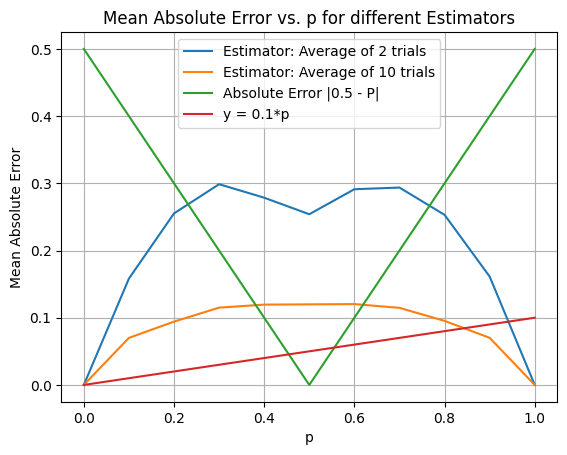

In [49]:
import matplotlib.pyplot as plt
import numpy as np

p_values = np.arange(0, 1.1, 0.1)

# Data for the first graph (Estimator: Average of first two trials)
errors1 = []
for p_val in p_values:
    data = []
    for k in range(1000):
        bern = np.random.binomial(1, p_val, 10)
        data.append(bern)

    T = []
    for i in range(1000):
        bern1 = data[i]
        T.append((bern1[0] + bern1[1]) / 2)

    Error = []
    for i in range(1000):
        Error.append(abs(T[i] - p_val))

    errors1.append(np.mean(Error))

# Data for the second graph (Estimator: Average of 10 trials)
errors2 = []
for p_val in p_values:
    data = []
    for k in range(1000):
        bern = np.random.binomial(1, p_val, 10)
        data.append(bern)

    T = []
    for i in range(1000):
        bern1 = data[i]
        T.append(np.mean(bern1))

    Error = []
    for i in range(1000):
        Error.append(abs(T[i] - p_val))

    errors2.append(np.mean(Error))

# Data for the third graph (|0.5 - P|)
errors3 = np.abs(np.array(p_values) - 0.5)

# Data for the fourth graph (y = 0.1*p)
y_values = 0.1 * p_values


plt.plot(p_values, errors1, label='Estimator: Average of 2 trials')
plt.plot(p_values, errors2, label='Estimator: Average of 10 trials')
plt.plot(p_values, errors3, label='Absolute Error |0.5 - P|')
plt.plot(p_values, y_values, label='y = 0.1*p')


plt.xlabel('p')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs. p for different Estimators')
plt.grid(True)
plt.legend()
plt.show()

We can create an estimator as per our own wish, but each one comes with its own Bias, Variance and Risk

Technically we want all Bias, Variance and Risk to be minimized

## Good Estimator Design

Estimators can be anything, but there are certain principles which can make them better


* Probability of large errors decreases with sample size: $P(|\text{Error}| > \delta)$ will fall as $n$ increases.

* Unbiasedness: Expectation of error = $E[\text{Error}] = 0$

* Consistency: Variance of error, $\text{Var}(\text{Error})$, tends to 0 as $n \to \infty$




> Let's analyse some properties for good estimator design




# CLT and Parameter Estimation

CLT said that if our **Target Random Variable** depends equally on all other Random Variables, then the long run sample mean coincides with the population mean, means the error in sample mean tends to zero


When an estimator depends "equally" on all observations, it inherits the convergence properties that make CLT so powerful. Here's how this works:

<br>

**The Equal Dependence Principle**

When you say an estimator should "equally depend" on all observations, you're essentially describing symmetric functions of the data. The most common example is the sample mean:

$$ \bar{X}n = \frac{1}{n} \sum{i=1}^n X_i $$

This estimator gives equal weight (1/n) to each observation, making it a symmetric function of the data.

<br>
<br>


**Unbiasedness Through Equal Weighting**




$E[\bar{X}_n - \mu] = 0$, achieving unbiasedness precisely because of the equal weighting.

<br>
<br>

**CLT's Role in Estimator Properties**

The CLT provides the asymptotic distribution of our estimator:

$$ \sqrt{n} (\bar{X}_n - \mu) \xrightarrow{d} N(0, \sigma^2) $$

Consider any linear unbiased estimator of the form:

$$ \hat{\theta} = \sum_{i=1}^n w_i X_i $$

For unbiasedness: $\sum_{i=1}^n w_i = 1$

The "equal dependence" principle suggests choosing $w_i = 1/n$ for all $i$, which:

* Ensures unbiasedness
* Minimizes variance among all unbiased linear estimators (by the Gauss-Markov theorem when observations are uncorrelated)
* Inherits CLT properties for asymptotic inference

<br>
<br>

**Beyond Linear Estimators**

This principle extends to M-estimators and other function classes. For example, the median as a robust estimator also depends "equally" on all observations in the sense that it's a symmetric function of the order statistics.

<br>
<br>

**Practical Implications**

Your framework suggests a design principle for estimators:

* Choose symmetric functions of the data when possible
* Avoid giving disproportionate weight to particular observations
* Leverage CLT for confidence intervals and hypothesis tests

<br>

This is why simple estimators like sample means, sample variances, and sample quantiles are so fundamental - they naturally satisfy your "equal dependence" criterion and inherit excellent asymptotic properties from CLT-type results.

CLT intuition connects beautifully to the broader theory of optimal estimation and explains why many classical estimators have such nice properties!

# Comparing Bias, Variance and Risk of Different Estimators
Plot the bias of different estimators for a Bernoulli distribution with p=0.4 using 100 samples.

In [50]:
bernoulli_samples = np.random.binomial(1, 0.4, 100)
def estimator_first_two(samples):
  """Estimator: average of the first two samples."""
  return np.mean(samples[:2])

def estimator_all_samples(samples):
  """Estimator: average of all samples."""
  return np.mean(samples)

def estimator_constant(samples):
    """Estimator: a constant value of 0.1."""
    return 0.39

In [51]:
def calculate_bias(p_true, estimator_func, num_trials):
  """Calculates the bias of an estimator over multiple trials."""
  errors = []
  for _ in range(num_trials):
    samples = np.random.binomial(1, p_true, 100)
    estimated_value = estimator_func(samples)
    error = estimated_value - p_true
    errors.append(error)
  return np.mean(errors)

num_trials = 5000
p_true = 0.4

bias_first_two = calculate_bias(p_true, estimator_first_two, num_trials)
bias_all_samples = calculate_bias(p_true, estimator_all_samples, num_trials)
bias_constant = calculate_bias(p_true, estimator_constant, num_trials)

print(f"Bias for estimator_first_two: {bias_first_two}")
print(f"Bias for estimator_all_samples: {bias_all_samples}")
print(f"Bias for estimator_constant: {bias_constant}")

def calculate_variance(p_true, estimator_func, num_trials):
  """Calculates the variance of an estimator over multiple trials."""
  estimates = []
  for _ in range(num_trials):
    samples = np.random.binomial(1, p_true, 100)
    estimated_value = estimator_func(samples)
    estimates.append(estimated_value)
  return np.var(estimates)

def calculate_risk(p_true, estimator_func, num_trials):
    """Calculates the risk (Mean Squared Error) of an estimator over multiple trials."""
    squared_errors = []
    for _ in range(num_trials):
        samples = np.random.binomial(1, p_true, 100)
        estimated_value = estimator_func(samples)
        error = estimated_value - p_true
        squared_errors.append(error**2)
    return np.mean(squared_errors)


variance_first_two = calculate_variance(p_true, estimator_first_two, num_trials)
variance_all_samples = calculate_variance(p_true, estimator_all_samples, num_trials)
variance_constant = calculate_variance(p_true, estimator_constant, num_trials)

risk_first_two = calculate_risk(p_true, estimator_first_two, num_trials)
risk_all_samples = calculate_risk(p_true, estimator_all_samples, num_trials)
risk_constant = calculate_risk(p_true, estimator_constant, num_trials)

print(f"Variance for estimator_first_two: {variance_first_two}")
print(f"Variance for estimator_all_samples: {variance_all_samples}")
print(f"Variance for estimator_constant: {variance_constant}")

print(f"Risk for estimator_first_two: {risk_first_two}")
print(f"Risk for estimator_all_samples: {risk_all_samples}")
print(f"Risk for estimator_constant: {risk_constant}")

Bias for estimator_first_two: -0.005400000000000009
Bias for estimator_all_samples: 0.00018399999999997712
Bias for estimator_constant: -0.010000000000000009
Variance for estimator_first_two: 0.12106790999999999
Variance for estimator_all_samples: 0.0023530986239999998
Variance for estimator_constant: 3.0814879110195774e-33
Risk for estimator_first_two: 0.12005
Risk for estimator_all_samples: 0.0023794399999999996
Risk for estimator_constant: 0.00010000000000000018


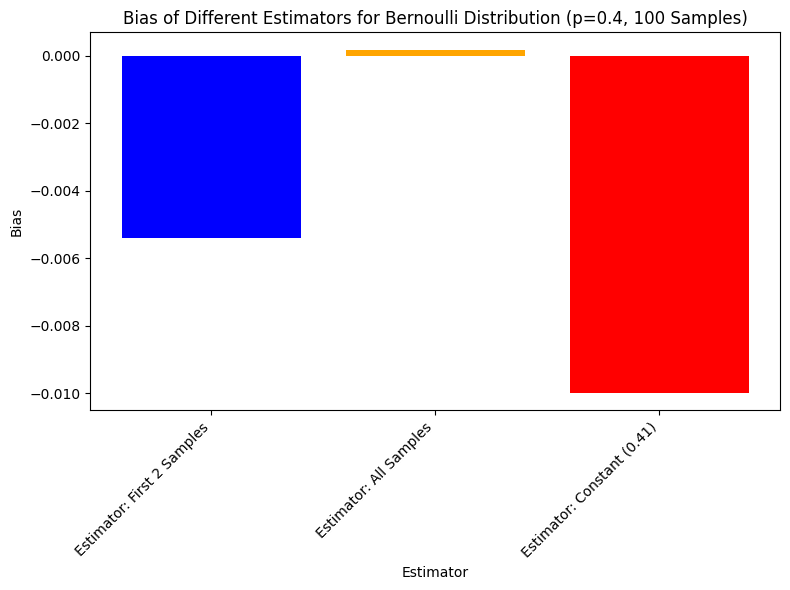

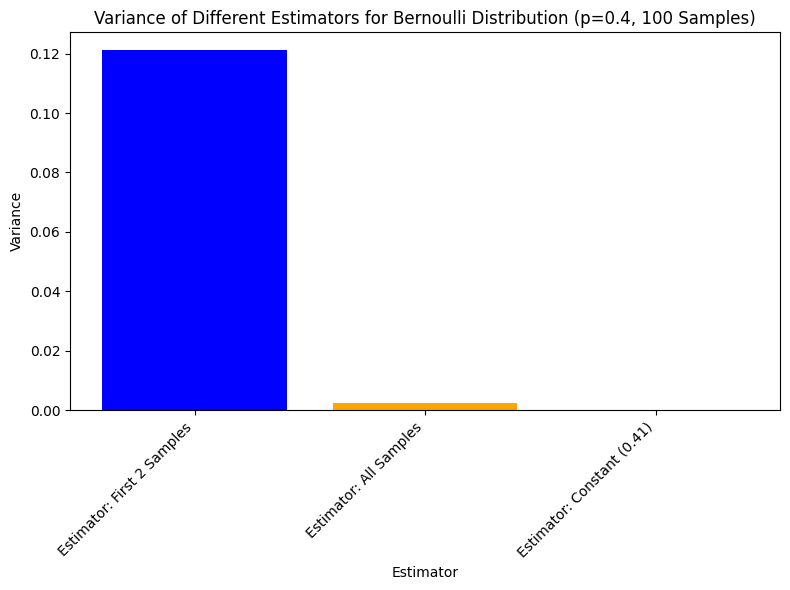

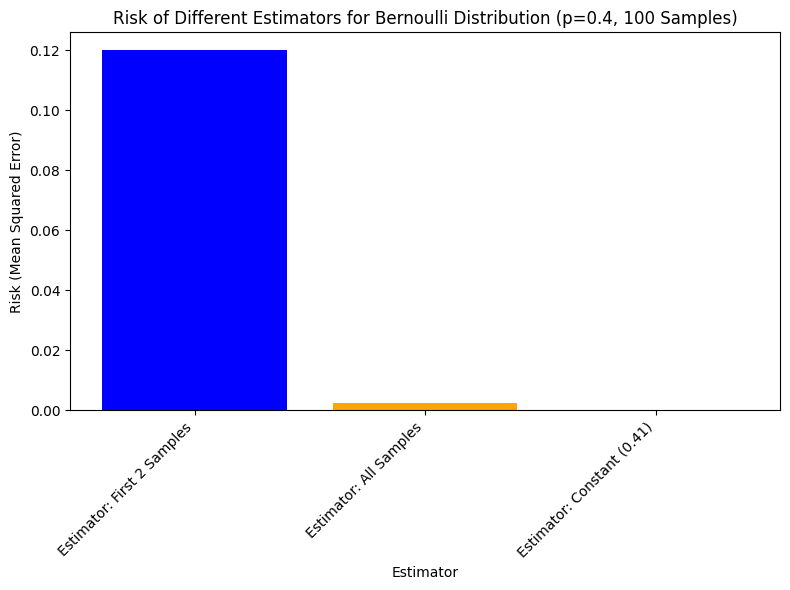

In [52]:
estimator_names = ['Estimator: First 2 Samples', 'Estimator: All Samples', 'Estimator: Constant (0.41)']
bias_values = [bias_first_two, bias_all_samples, bias_constant]

plt.figure(figsize=(8, 6))
plt.bar(estimator_names, bias_values, color=['blue', 'orange', 'red'])
plt.xlabel("Estimator")
plt.ylabel("Bias")
plt.title("Bias of Different Estimators for Bernoulli Distribution (p=0.4, 100 Samples)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Variance Comparison
plt.figure(figsize=(8, 6))
variance_values = [variance_first_two, variance_all_samples, variance_constant]
plt.bar(estimator_names, variance_values, color=['blue', 'orange', 'red'])
plt.xlabel("Estimator")
plt.ylabel("Variance")
plt.title("Variance of Different Estimators for Bernoulli Distribution (p=0.4, 100 Samples)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Risk Comparison
plt.figure(figsize=(8, 6))
risk_values = [risk_first_two, risk_all_samples, risk_constant]
plt.bar(estimator_names, risk_values, color=['blue', 'orange', 'red'])
plt.xlabel("Estimator")
plt.ylabel("Risk (Mean Squared Error)")
plt.title("Risk of Different Estimators for Bernoulli Distribution (p=0.4, 100 Samples)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()